<a href="https://colab.research.google.com/github/CastilloGabriela/Hands-On-Data-Preprocessing-in-Python/blob/main/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---


NOMBRE: 
*   Nancy Gabriela González Castillo 
*   Rodia Zuriel Tejeda Moreno  
*   Dafne Avelín Durón Castán 

MATRÍCULA: 
*   A01794546
*   A01260437 
*   A00823833 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia y Analítica de datos/Semana 9" #Dafne
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analitica de datos/Semana9" #Rodia
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Semana 9"
os.chdir(DIR)

SyntaxError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [ ]:
print("Estadísticas descriptivas de variables cuantitativas:\n", data_df.describe().T, '\n')

Estadísticas descriptivas de variables cuantitativas:
                          count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2

In [ ]:
print("Estadísticas descriptivas de variables categóricas:\n", data_df.describe(include = "object"), '\n')

Estadísticas descriptivas de variables categóricas:
        diagnosis
count        569
unique         2
top            B
freq         357 



1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [ ]:
"""
for column_name in data_df.columns:
  print(column_name, ":")
  print(data_df[column_name].unique())
"""
print("Valores unicos de diagnosis:", data_df["diagnosis"].unique())

Valores unicos de diagnosis: ['M' 'B']


1c) Búsqueda de valores faltantes.

In [ ]:
print("Valores faltantes por columna:\n", data_df.isna().sum(), '\n')

Valores faltantes por columna:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64 



1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

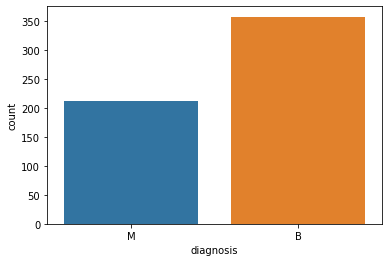

In [ ]:
sns.countplot(x="diagnosis", data=data_df)

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

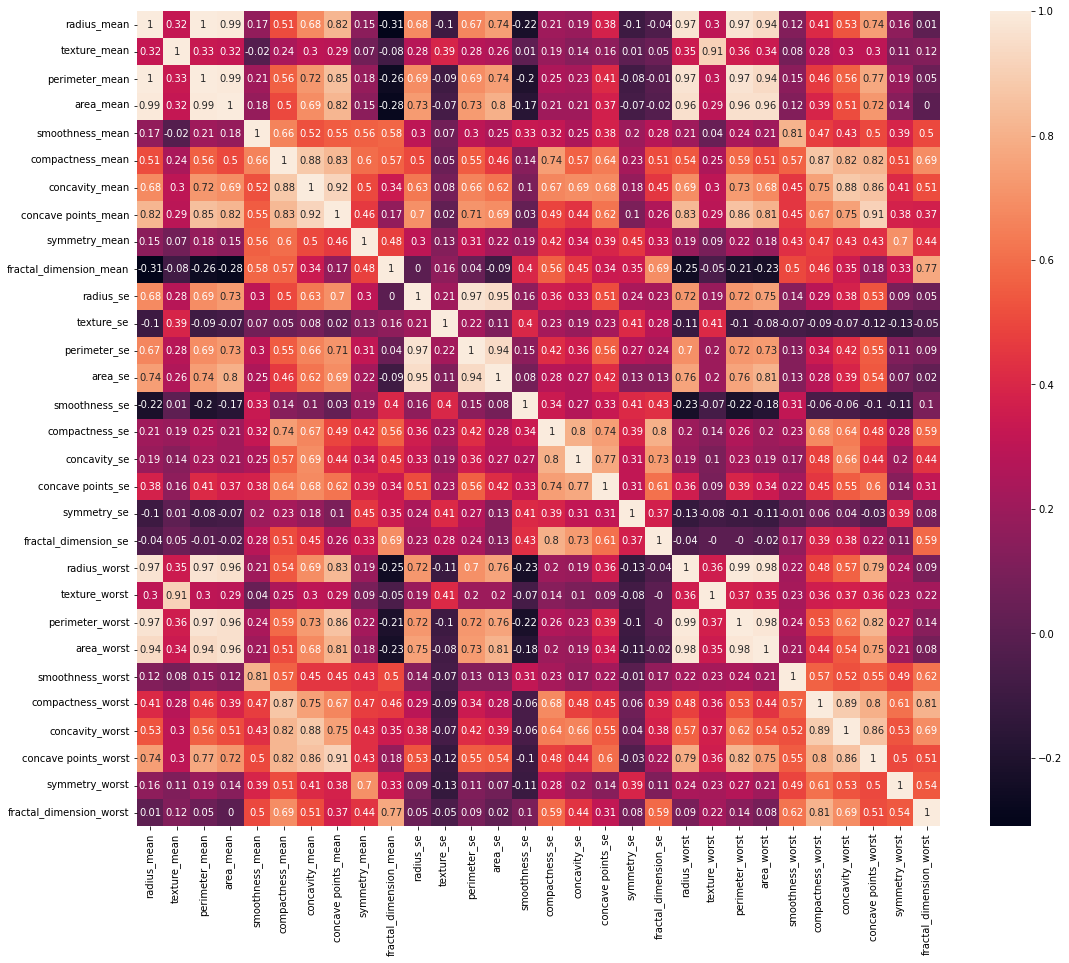

In [ ]:
plt.figure(figsize=(18, 15))
correlation = data_df.corr(method='pearson')
sns.heatmap(round(correlation,2), annot=True)
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

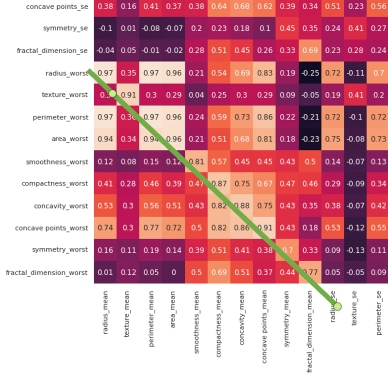

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
data_df.drop(data_df.iloc[:, 21:], axis=1, inplace=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




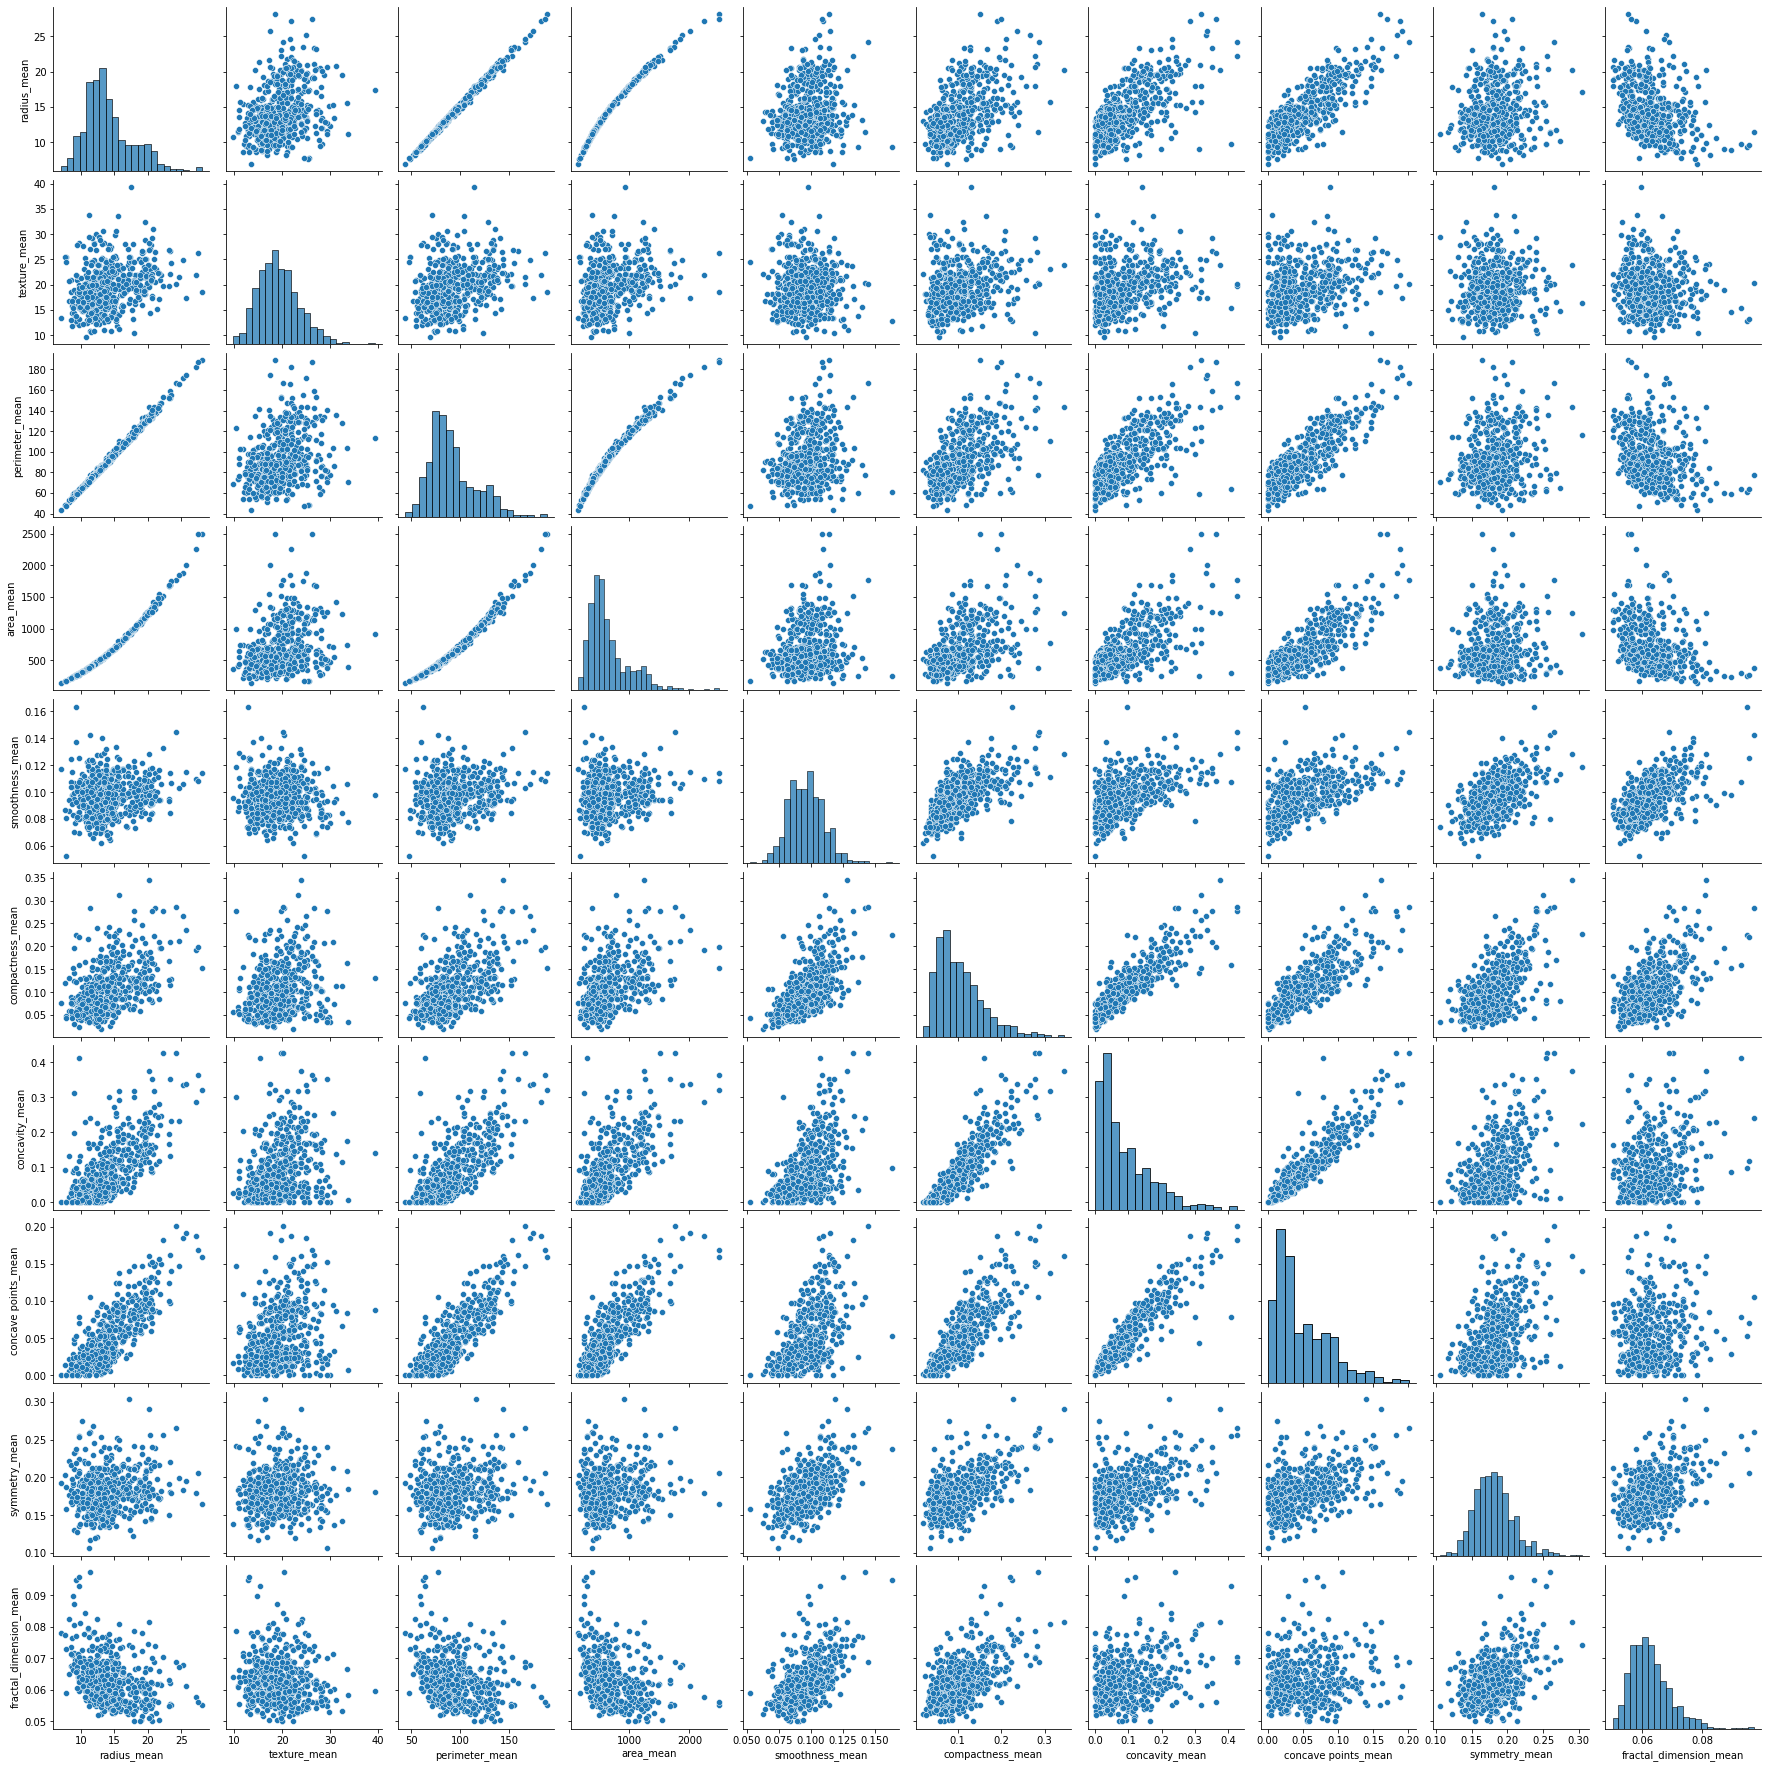

In [ ]:
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 

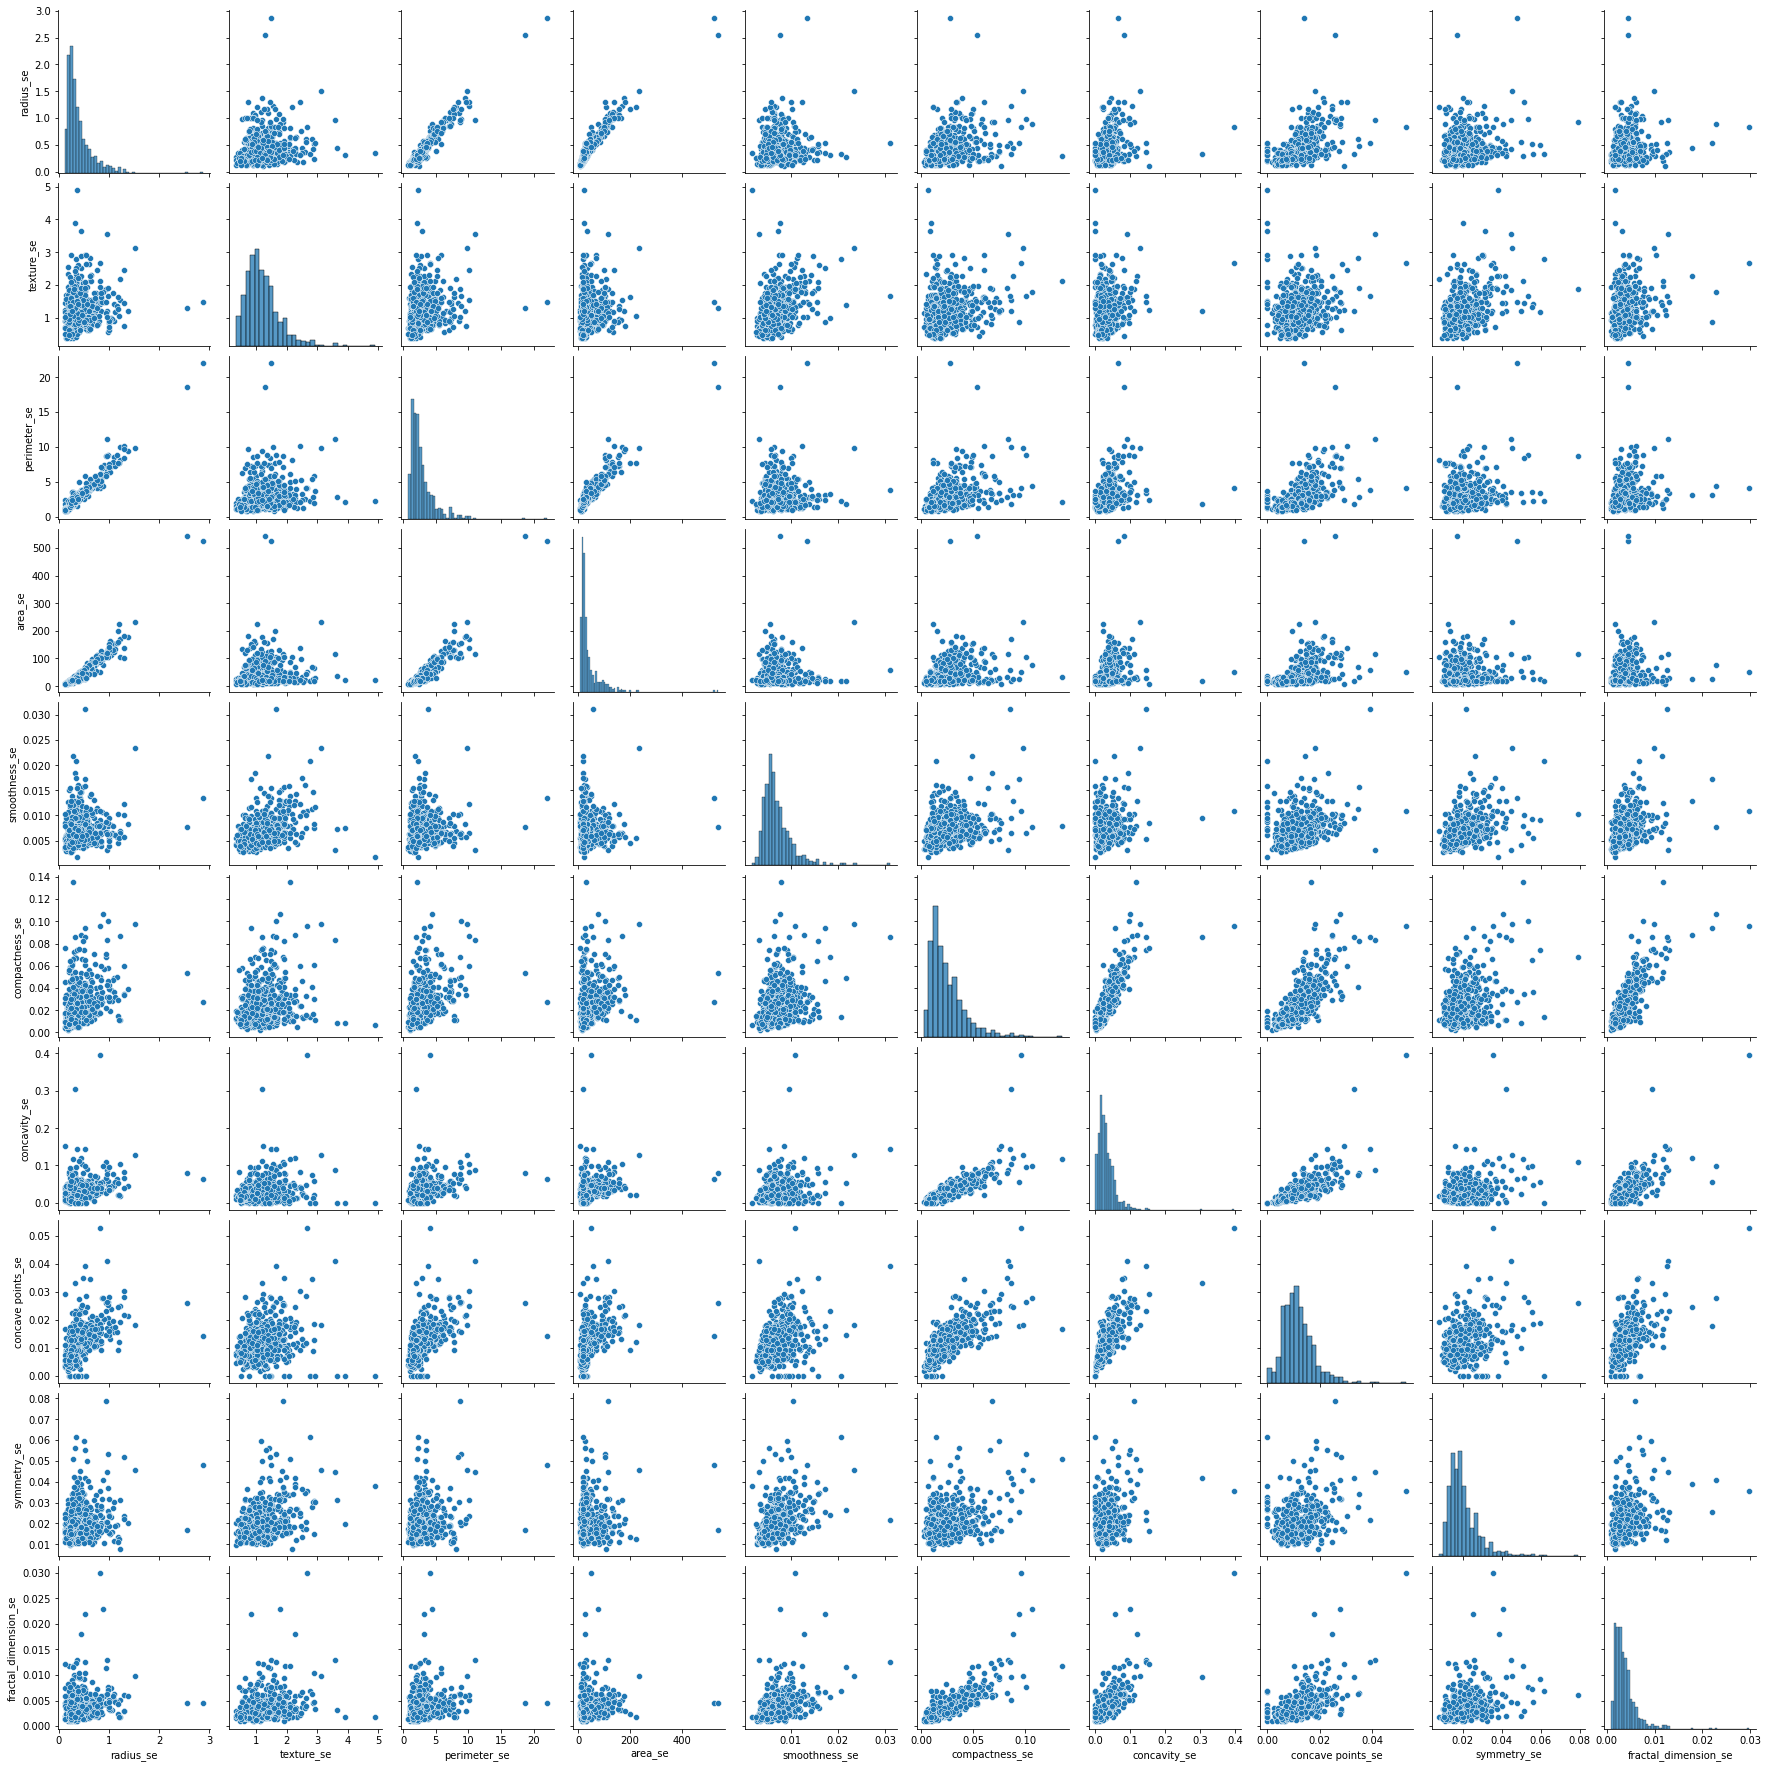

In [ ]:
sns.pairplot(data=data_df[['radius_se', 
        'texture_se', 
        'perimeter_se', 
        'area_se', 
        'smoothness_se', 
        'compactness_se', 
        'concavity_se',
        'concave points_se', 
        'symmetry_se', 
        'fractal_dimension_se']]) 

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


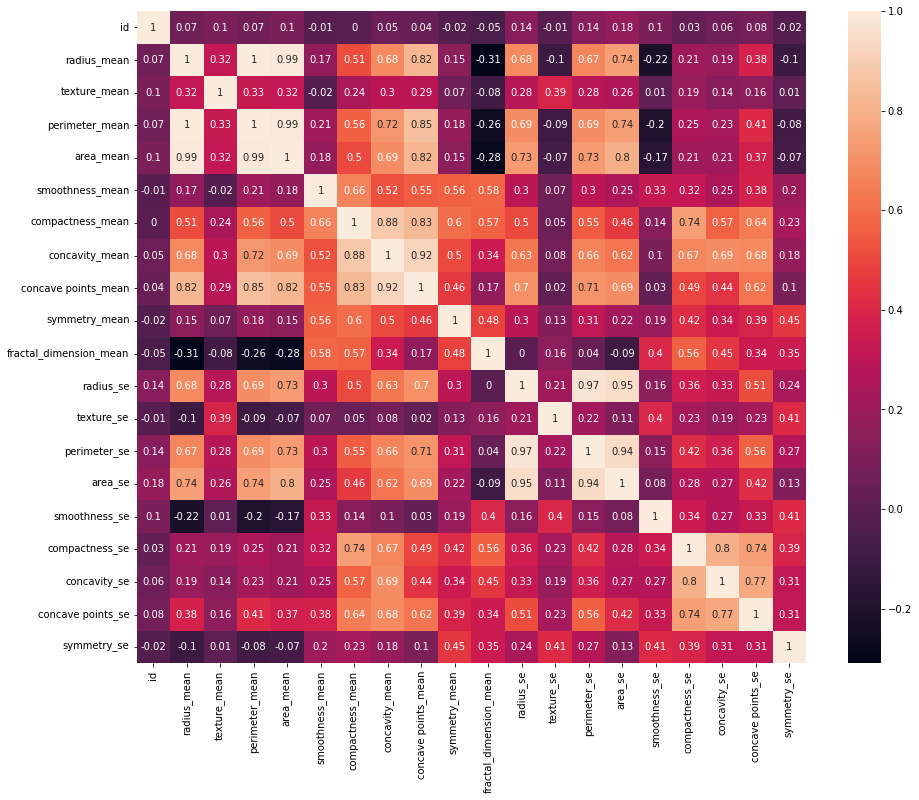

In [ ]:
plt.figure(figsize=(15, 12))
correlation = data_df.corr(method='pearson')
sns.heatmap(round(correlation,2), annot=True)
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [ ]:
data_df.drop(columns=["perimeter_mean", "area_mean", "concavity_mean", "concave points_mean"], inplace=True)
data_df.drop(columns=["perimeter_se", "area_se", "concavity_se", "concave points_se"], inplace=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   smoothness_mean         569 non-null    float64
 5   compactness_mean        569 non-null    float64
 6   symmetry_mean           569 non-null    float64
 7   fractal_dimension_mean  569 non-null    float64
 8   radius_se               569 non-null    float64
 9   texture_se              569 non-null    float64
 10  smoothness_se           569 non-null    float64
 11  compactness_se          569 non-null    float64
 12  symmetry_se             569 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

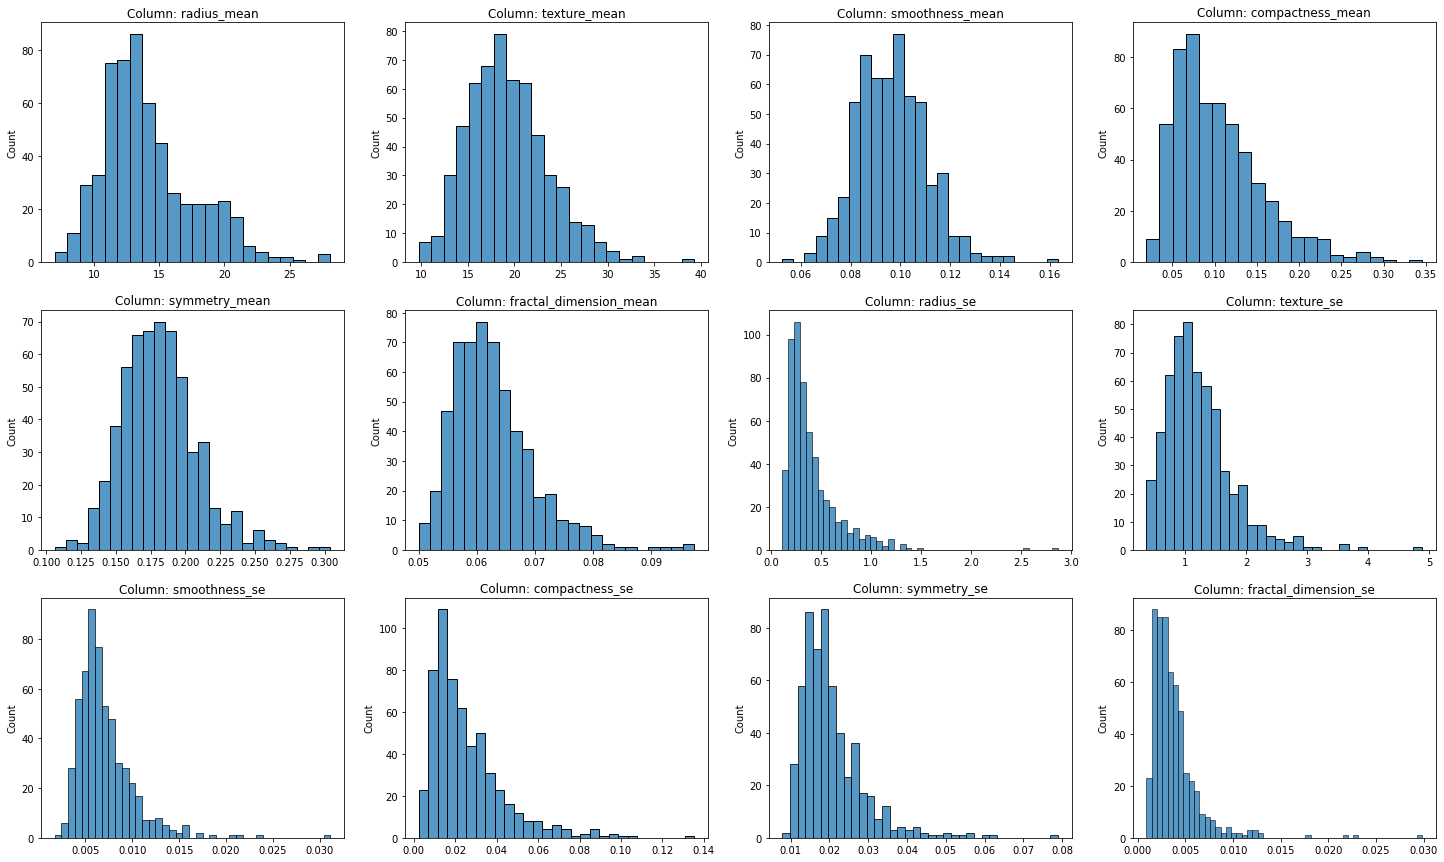

In [ ]:
i = data_df.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 15), sharex=False, sharey=False)
axes = axes.ravel()

for col, ax in zip(i, axes):
    sns.histplot(data=data_df[col], ax=ax)
    ax.set(title=f'Column: {col}', xlabel=None)

In [ ]:
data_df.skew()

<ipython-input-56-8bd66715350b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_df.skew()


radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64

In [ ]:
skew_cols = ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


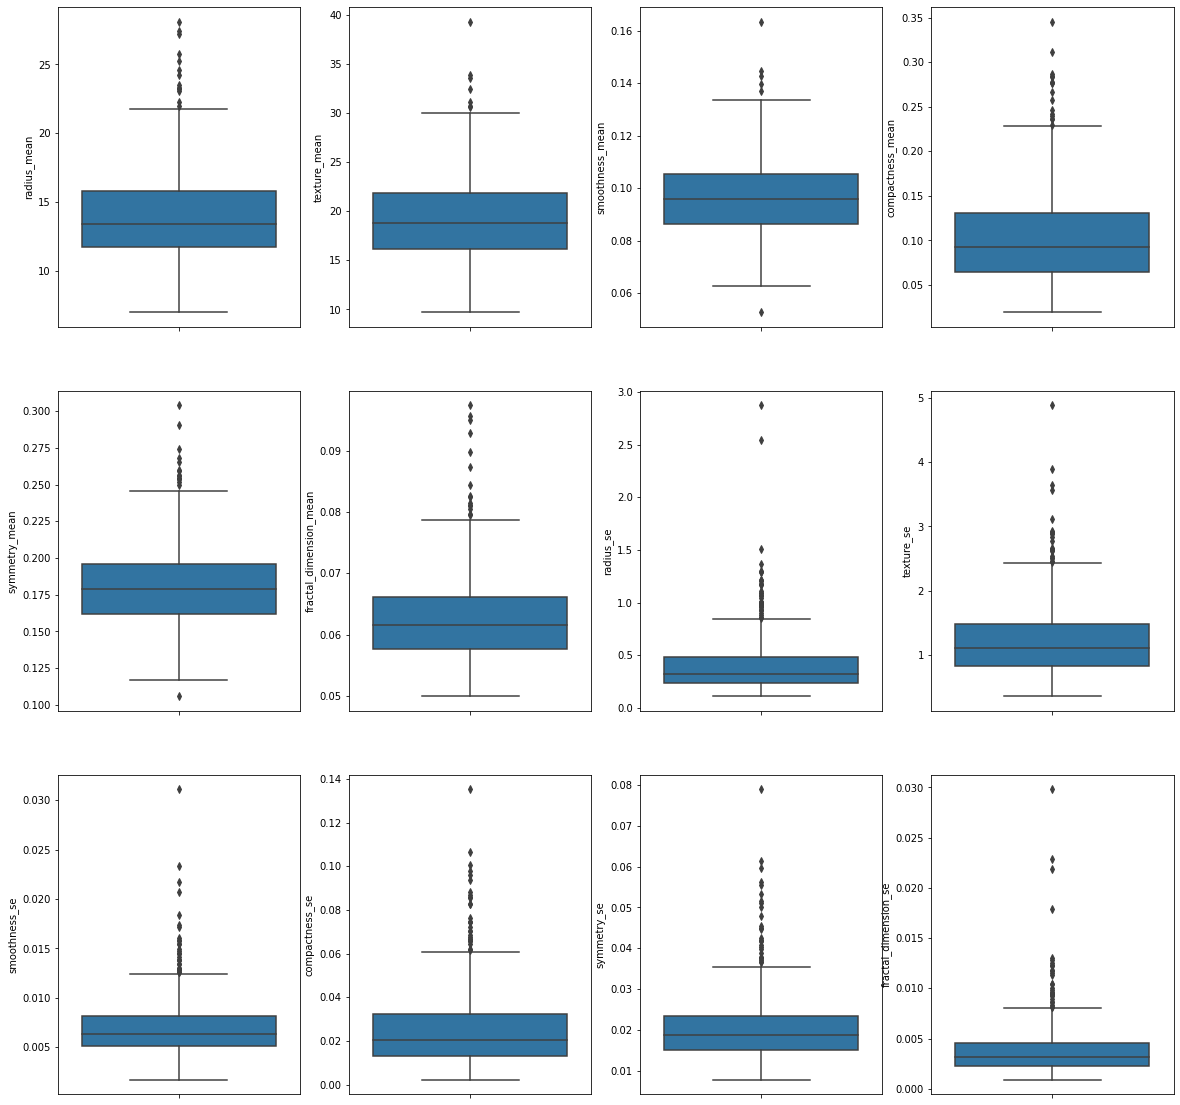

In [ ]:
i = data_df.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20), sharex=False, sharey=False)
axes = axes.ravel()

for col, ax in zip(i, axes):
    sns.boxplot(y=data_df[col], ax=ax)

In [ ]:
scale_cols = ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_df.set_index('id', inplace=True)
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
y = data_df.loc[:,'diagnosis'] # variable de salida
x = data_df.iloc[:, 1:] # predictores (numéricos y categóricos)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
        ("drop_out", 'drop', ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
                              "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst",
                              "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean",
                              "perimeter_se", "area_se", "concavity_se", "concave points_se"])
    ], remainder='passthrough') 

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

logr_model = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LogisticRegression())
])

logr_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_out', 'drop',
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se'])])),
                ('regressor', LogisticRegression())])

In [ ]:
logr_model.fit(xtrain, ytrain)
ypredict = logr_model.predict(xtest)
ypredict[:10]

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

print('Confusion matrix:')
print(confusion_matrix(ytest, ypredict, labels=['B','M']))
print('Precision = ', precision_score(ytest, ypredict, pos_label='M'))
print('Recall =', recall_score(ytest, ypredict, pos_label='M')) 
print('Accuracy =', accuracy_score(ytest, ypredict)) 

Confusion matrix:
[[68  4]
 [10 32]]
Precision =  0.8888888888888888
Recall = 0.7619047619047619
Accuracy = 0.8771929824561403


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

sqrt_transformer = FunctionTransformer(np.sqrt)
minmax_transformer = MinMaxScaler(feature_range=(0, 1))

preprocessing = ColumnTransformer([
        ("drop_out", 'drop', ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", 
                              "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst",
                              "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean",
                              "perimeter_se", "area_se", "concavity_se", "concave points_se"]),
        ("sqrt", sqrt_transformer, skew_cols),
        ("minmax", minmax_transformer, scale_cols)
    ], remainder='passthrough') 

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2 = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", LogisticRegression())
])

logr_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_out', 'drop',
                                                  ['radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'concavity_mean',
                                                   'concave poi...
                                                   'perimeter_se', 'area_se',
                                                   'concavity_se',
                                                   'concave points_se']),
                                                 ('sqrt',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  ['compactness_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'smoothness_se',
                                                   'compactness_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['radius_mean',
                                                   'texture_mean', 'radius_se',
                                                   'texture_se'])])),
                ('regressor', LogisticRegression())])

In [ ]:
logr_model2.fit(xtrain, ytrain)
ypredict = logr_model2.predict(xtest)
ypredict[:10]

array(['B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

print('Confusion matrix:')
print(confusion_matrix(ytest, ypredict, labels=['B','M']))
print('Precision = ', precision_score(ytest, ypredict, pos_label='M'))
print('Recall =', recall_score(ytest, ypredict, pos_label='M')) 
print('Accuracy =', accuracy_score(ytest, ypredict)) 

Confusion matrix:
[[72  0]
 [11 31]]
Precision =  1.0
Recall = 0.7380952380952381
Accuracy = 0.9035087719298246


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [ ]:
y = data_df.loc[:,'diagnosis'] # variable de salida
x = data_df.iloc[:, 1:] # predictores (numéricos y categóricos)
total_components = x.shape[1]

In [ ]:
# Escalando valores de x
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [ ]:
np.cumsum(pca.explained_variance_ratio_)
#17 componentes por el arreglo 

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

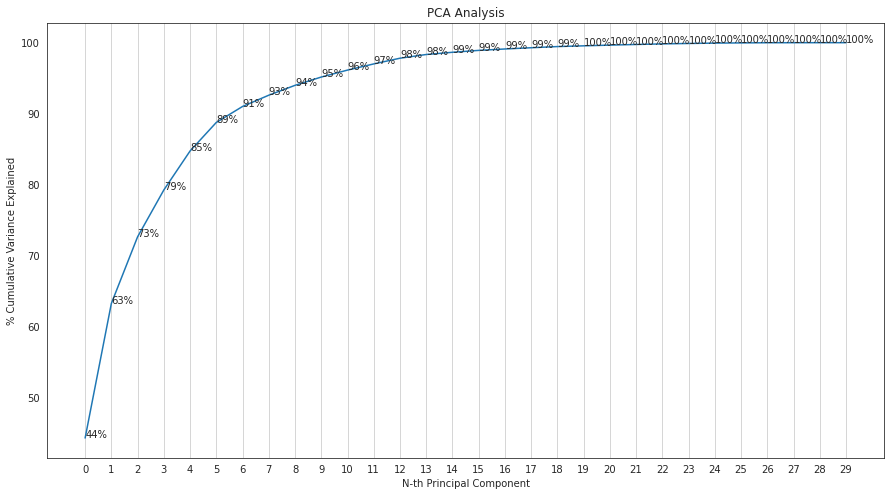

In [ ]:
sns.set_style('white')

plt.figure(figsize=(15, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
plt.grid(axis = 'x')

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

# 15 componentes con la grafica

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.99) + 1
n_components

17

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [ ]:
logr_model2 = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=17)),
    ("regressor", LogisticRegression())
])

logr_model2

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('regressor', LogisticRegression())])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)
logr_model2.fit(xtrain, ytrain)
ypred = logr_model2.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
recall = recall_score(ytest, ypred, pos_label='M')
precision = precision_score(ytest, ypred, pos_label='M')
confusion = confusion_matrix(ytest, ypred, labels=['B','M'])
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'Confusion matrix:\n{confusion}')

Accuracy: 0.9824561403508771
Recall: 0.9523809523809523
Precision: 1.0
Confusion matrix:
[[72  0]
 [ 2 40]]


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

In [ ]:
#La métrica más importante para un modelo de diagnóstico médico es la sensibilidad, pues mide la capacidad del modelo para identificar correctamente los casos de enfermedad,
#se deben minimizar lo más posible los falsos negativos (casos donde el modelo clasifica incorrectamente a un enfermo como sano), pues podría conducir a retrasos en el diagnóstico
#y tratamiento.
#En cuanto al treshold, se buscaría establecer un umbral que maximice la sensibilidad del modelo a expensas de una menor especificidad, es decir, disminuir el treshold. Es preferible tener más falsos positivos
#que falsos negativos, pues los falsos positivos pueden ser manejados mediante pruebas adicionales.